In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines.common.policies import MlpPolicy as PPO_MLP
from stable_baselines.deepq.policies import MlpPolicy as DQN_MLP
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import DQN
from environment.Stock_trading_env import Stock_trading

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_list = ['sh.000001','sz.000002','sz.002371','sh.600004','sh.600030','sh.600036','sh.600276','sh.600519','sh.600900','sh.601318']

In [3]:
def find_file(path, name):
    for root, dirs, files in os.walk(path):
        for fname in files:
            if name in fname:
                return os.path.join(root, fname)

In [8]:
def stock_trade(stock_file):
    day_profits = []
    df = pd.read_csv(stock_file)
    df = df.sort_values('date')

    env = DummyVecEnv([lambda: Stock_trading(df)])

    model = PPO2(PPO_MLP, env, verbose=0, tensorboard_log='.\\log')
    model.learn(total_timesteps=int(1e4))

    df_test = pd.read_csv(stock_file.replace('train', 'test'))

    env = DummyVecEnv([lambda: Stock_trading(df_test)])
    obs = env.reset()
    for i in range(len(df_test) - 1):
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        profit = env.render()
        day_profits.append(profit)
        if done:
            break
    return day_profits

In [5]:
def single_stock(stock_code):
    stock_file = find_file('.\\data\\train', str(stock_code))

    daily_profits = stock_trade(stock_file)
    fig, ax = plt.subplots()
    ax.plot(daily_profits, '-o', label=stock_code, marker='o', ms=10, alpha=0.7, mfc='orange')
    ax.grid()
    plt.xlabel('step')
    plt.ylabel('profit')
    ax.legend()
    plt.savefig('.\\image\\{}_PnL.png'.format(stock_code))
    return daily_profits

In [6]:
def multi_stock():
    group_result = []
    stock_list = ['sh.000001','sz.000002','sz.002371','sh.600004','sh.600030','sh.600036','sh.600276','sh.600519','sh.600900','sh.601318']

    for code in stock_list:
        stock_file = find_file('.\\data\\train', str(code))
        if stock_file:
            try:
                profits = single_stock(stock_file)
                group_result.append(profits)
            except Exception as e:
                print(e)

    with open('multi_stock.pkl', 'wb') as f:
        pickle.dump(group_result, f)

In [11]:
stock_code='sz.002371'
stock_file = find_file('.\\data\\train', str(stock_code))
daily_profits = stock_trade(stock_file)

------------------------------
Step: 1
Balance: 1000000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 1000000.0 (Max net worth: 1000000)
Profit: 0.0
------------------------------
Step: 2
Balance: 1000000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 1000000.0 (Max net worth: 1000000)
Profit: 0.0
------------------------------
Step: 3
Balance: 548350.4456370631
Shares held: 16129 (Total sold: 0)
Avg cost for held shares: 28.002328375158832 (Total sales value: 0.0)
Net worth: 1000000.0 (Max net worth: 1000000)
Profit: 0.0
------------------------------
Step: 4
Balance: 548350.4456370631
Shares held: 16129 (Total sold: 0)
Avg cost for held shares: 28.002328375158832 (Total sales value: 0.0)
Net worth: 998914.9840161793 (Max net worth: 1000000)
Profit: -1085.01598382066
------------------------------
Step: 5
Balance: 1.9077143602771685
Shares held: 35424 (Total sold: 0)
Avg cost for held sh

Step: 108
Balance: 14.209093050573301
Shares held: 36126 (Total sold: 227234)
Avg cost for held shares: 23.50411300349299 (Total sales value: 6295825.663657865)
Net worth: 918852.8466918668 (Max net worth: 1017644.7081076565)
Profit: -81147.15330813325
------------------------------
Step: 109
Balance: 913818.0615564373
Shares held: 0 (Total sold: 263360)
Avg cost for held shares: 0 (Total sales value: 7209629.5161212515)
Net worth: 913818.0615564373 (Max net worth: 1017644.7081076565)
Profit: -86181.93844356271
------------------------------
Step: 110
Balance: 913818.0615564373
Shares held: 0 (Total sold: 263360)
Avg cost for held shares: 0 (Total sales value: 7209629.5161212515)
Net worth: 913818.0615564373 (Max net worth: 1017644.7081076565)
Profit: -86181.93844356271
------------------------------
Step: 111
Balance: 913818.0615564373
Shares held: 0 (Total sold: 263360)
Avg cost for held shares: 0 (Total sales value: 7209629.5161212515)
Net worth: 913818.0615564373 (Max net worth: 10

------------------------------
Step: 206
Balance: 590.754709215671
Shares held: 34438 (Total sold: 475286)
Avg cost for held shares: 29.846158460649498 (Total sales value: 12481716.899318147)
Net worth: 1354958.2053153496 (Max net worth: 1354958.2053153496)
Profit: 354958.2053153496
------------------------------
Step: 207
Balance: 433.93915880594335
Shares held: 34442 (Total sold: 475286)
Avg cost for held shares: 29.847245241805272 (Total sales value: 12481716.899318147)
Net worth: 1350694.235961766 (Max net worth: 1354958.2053153496)
Profit: 350694.235961766
------------------------------
Step: 208
Balance: 4.906690909175779
Shares held: 34453 (Total sold: 475286)
Avg cost for held shares: 29.850168434857746 (Total sales value: 12481716.899318147)
Net worth: 1343773.599095212 (Max net worth: 1354958.2053153496)
Profit: 343773.59909521206
------------------------------
Step: 209
Balance: 4.906690909175779
Shares held: 34453 (Total sold: 475286)
Avg cost for held shares: 29.8501684348

------------------------------
Step: 269
Balance: 18.62702851765789
Shares held: 33679 (Total sold: 533580)
Avg cost for held shares: 32.93704856181633 (Total sales value: 14525042.69707466)
Net worth: 1002139.1869286409 (Max net worth: 1571620.6185212517)
Profit: 2139.1869286409346
------------------------------
Step: 270
Balance: 18.62702851765789
Shares held: 33679 (Total sold: 533580)
Avg cost for held shares: 32.93704856181633 (Total sales value: 14525042.69707466)
Net worth: 936544.1043940028 (Max net worth: 1571620.6185212517)
Profit: -63455.89560599718
------------------------------
Step: 271
Balance: 18.62702851765789
Shares held: 33679 (Total sold: 533580)
Avg cost for held shares: 32.93704856181633 (Total sales value: 14525042.69707466)
Net worth: 898457.9009328373 (Max net worth: 1571620.6185212517)
Profit: -101542.09906716272
------------------------------
Step: 272
Balance: 18.62702851765789
Shares held: 33679 (Total sold: 533580)
Avg cost for held shares: 32.937048561816

------------------------------
Step: 373
Balance: 24.58765783396666
Shares held: 31352 (Total sold: 604553)
Avg cost for held shares: 45.173112150420316 (Total sales value: 17379500.531287417)
Net worth: 1671111.2370136383 (Max net worth: 1700727.4451618097)
Profit: 671111.2370136383
------------------------------
Step: 374
Balance: 24.58765783396666
Shares held: 31352 (Total sold: 604553)
Avg cost for held shares: 45.173112150420316 (Total sales value: 17379500.531287417)
Net worth: 1690363.0057534599 (Max net worth: 1700727.4451618097)
Profit: 690363.0057534599
------------------------------
Step: 375
Balance: 24.58765783396666
Shares held: 31352 (Total sold: 604553)
Avg cost for held shares: 45.173112150420316 (Total sales value: 17379500.531287417)
Net worth: 1688049.47326133 (Max net worth: 1700727.4451618097)
Profit: 688049.47326133
------------------------------
Step: 376
Balance: 24.58765783396666
Shares held: 31352 (Total sold: 604553)
Avg cost for held shares: 45.173112150420

------------------------------
Step: 465
Balance: 23.268980983179063
Shares held: 29860 (Total sold: 664859)
Avg cost for held shares: 47.348994682691 (Total sales value: 20380040.609279204)
Net worth: 1210718.123320114 (Max net worth: 1733974.049087938)
Profit: 210718.1233201141
------------------------------
Step: 466
Balance: 456039.3113457397
Shares held: 18383 (Total sold: 676336)
Avg cost for held shares: 47.348994682691 (Total sales value: 20836056.65164396)
Net worth: 1186451.6932217805 (Max net worth: 1733974.049087938)
Profit: 186451.69322178047
------------------------------
Step: 467
Balance: 16.441970174375456
Shares held: 29699 (Total sold: 676336)
Avg cost for held shares: 44.66276435662729 (Total sales value: 20836056.65164396)
Net worth: 1196854.829879764 (Max net worth: 1733974.049087938)
Profit: 196854.829879764
------------------------------
Step: 468
Balance: 16.441970174375456
Shares held: 29699 (Total sold: 676336)
Avg cost for held shares: 44.66276435662729 (Tot

------------------------------
Step: 587
Balance: 53.25307256705128
Shares held: 30241 (Total sold: 722736)
Avg cost for held shares: 57.43311004548805 (Total sales value: 23451852.039913725)
Net worth: 2010626.55929469 (Max net worth: 2334593.399030158)
Profit: 1010626.5592946899
------------------------------
Step: 588
Balance: 53.25307256705128
Shares held: 30241 (Total sold: 722736)
Avg cost for held shares: 57.43311004548805 (Total sales value: 23451852.039913725)
Net worth: 1959274.584413956 (Max net worth: 2334593.399030158)
Profit: 959274.5844139559
------------------------------
Step: 589
Balance: 53.25307256705128
Shares held: 30241 (Total sold: 722736)
Avg cost for held shares: 57.43311004548805 (Total sales value: 23451852.039913725)
Net worth: 1940603.571967264 (Max net worth: 2334593.399030158)
Profit: 940603.5719672639
------------------------------
Step: 590
Balance: 53.25307256705128
Shares held: 30241 (Total sold: 722736)
Avg cost for held shares: 57.43311004548805 (T

Step: 679
Balance: 41.81127313352772
Shares held: 32743 (Total sold: 839631)
Avg cost for held shares: 62.64801532879674 (Total sales value: 30955065.21041642)
Net worth: 2059757.0239320493 (Max net worth: 2679774.6949581075)
Profit: 1059757.0239320493
------------------------------
Step: 680
Balance: 41.81127313352772
Shares held: 32743 (Total sold: 839631)
Avg cost for held shares: 62.64801532879674 (Total sales value: 30955065.21041642)
Net worth: 2063975.1697712652 (Max net worth: 2679774.6949581075)
Profit: 1063975.1697712652
------------------------------
Step: 681
Balance: 41.81127313352772
Shares held: 32743 (Total sold: 839631)
Avg cost for held shares: 62.64801532879674 (Total sales value: 30955065.21041642)
Net worth: 2098708.9516211078 (Max net worth: 2679774.6949581075)
Profit: 1098708.9516211078
------------------------------
Step: 682
Balance: 706106.2225313983
Shares held: 21562 (Total sold: 850812)
Avg cost for held shares: 62.64801532879674 (Total sales value: 3166112

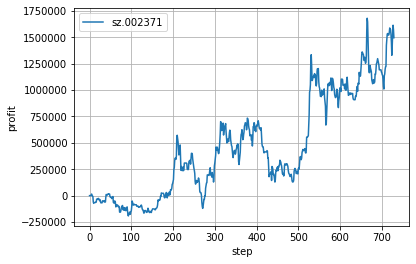

In [18]:
fig, ax = plt.subplots()
ax.plot(daily_profits, label=stock_code)
ax.grid()
plt.xlabel('step')
plt.ylabel('profit')
ax.legend()

In [21]:
stock_file = find_file('.\\data\\test', str(stock_code))
df = pd.read_csv(stock_file)
df = df.sort_values('date')

In [23]:
df.shape

(731, 17)

In [24]:
len(daily_profits)

730

In [26]:
df

date       code   open   high    low  close    volume  \
0    2017-01-03  sz.002371  26.68  27.06  26.50  26.66   2864953   
1    2017-01-04  sz.002371  26.80  28.41  26.68  28.38  12098215   
2    2017-01-05  sz.002371  28.00  28.32  27.78  28.01   6821171   
3    2017-01-06  sz.002371  27.72  28.19  27.66  27.98   5488285   
4    2017-01-09  sz.002371  27.99  29.20  27.77  28.94   7959187   
5    2017-01-10  sz.002371  28.75  29.07  28.39  28.39   4839261   
6    2017-01-11  sz.002371  28.32  28.97  28.08  28.42   4150953   
7    2017-01-12  sz.002371  28.23  28.50  28.01  28.08   3156928   
8    2017-01-13  sz.002371  27.91  28.69  27.50  28.10   4213174   
9    2017-01-16  sz.002371  28.10  28.10  25.29  26.30   6479672   
10   2017-01-17  sz.002371  26.01  27.16  25.80  26.97   4398809   
11   2017-01-18  sz.002371  26.71  26.99  26.00  26.23   3003381   
12   2017-01-19  sz.002371  26.04  26.28  25.71  26.19   2306718   
13   2017-01-20  sz.002371  26.19  27.40  26.05  27.07   4383804   
14   2017-01-23  sz.002371  27.14  27.80  26.90  27.13   3708178   
15   2017-01-24  sz.002371  27.11  27.47  26.82  27.28   3117721   
16   2017-01-25  sz.002371  27.23  27.59  26.84  27.50   3608034   
17   2017-01-26  sz.002371  27.60  28.20  27.51  28.19   4939004   
18   2017-02-03  sz.002371  28.13  28.26  27.79  27.84   2280862   
19   2017-02-06  sz.002371  27.79  28.57  27.60  28.34   5269570   
20   2017-02-07  sz.002371  28.27  28.33  27.70  27.85   3393342   
21   2017-02-08  sz.002371  27.67  28.36  27.67  28.28   4046864   
22   2017-02-09  sz.002371  28.18  28.42  27.92  28.32   3883166   
23   2017-02-10  sz.002371  28.36  28.37  27.72  27.82   4086357   
24   2017-02-13  sz.002371  27.56  28.09  27.30  28.09   4089420   
25   2017-02-14  sz.002371  28.08  28.14  27.82  27.91   2228774   
26   2017-02-15  sz.002371  27.98  28.07  26.76  27.08   3569665   
27   2017-02-16  sz.002371  27.08  27.24  26.82  27.01   3104467   
28   2017-02-17  sz.002371  27.10  27.15  26.48  26.73   3055308   
29   2017-02-20  sz.002371  26.73  26.85  26.18  26.66   2889765   
..          ...        ...    ...    ...    ...    ...       ...   
701  2019-11-20  sz.002371  77.25  78.37  75.60  75.80  12010427   
702  2019-11-21  sz.002371  75.00  76.60  74.68  76.04   7050673   
703  2019-11-22  sz.002371  76.01  77.99  71.88  72.71  15320798   
704  2019-11-25  sz.002371  73.50  73.80  70.20  70.61   8764381   
705  2019-11-26  sz.002371  70.91  72.07  70.63  71.50   7231074   
706  2019-11-27  sz.002371  71.50  77.24  71.10  76.05  13602278   
707  2019-11-28  sz.002371  75.75  78.56  75.45  77.00  12312990   
708  2019-11-29  sz.002371  77.75  78.38  76.20  78.20   9894925   
709  2019-12-02  sz.002371  78.49  81.71  77.18  80.00  12599516   
710  2019-12-03  sz.002371  78.80  81.00  78.35  79.99   7793311   
711  2019-12-04  sz.002371  79.99  87.99  79.99  86.33  22587735   
712  2019-12-05  sz.002371  86.01  91.76  85.41  88.16  22094602   
713  2019-12-06  sz.002371  88.67  90.94  87.77  90.31  11408152   
714  2019-12-09  sz.002371  90.90  91.97  88.64  88.64  10009669   
715  2019-12-10  sz.002371  88.70  91.48  87.20  90.10  10876228   
716  2019-12-11  sz.002371  89.35  93.33  87.42  89.87  13618922   
717  2019-12-12  sz.002371  89.60  92.95  89.60  90.80  12181807   
718  2019-12-13  sz.002371  91.28  91.49  86.80  90.30  12261385   
719  2019-12-16  sz.002371  89.82  92.30  87.60  92.30  14406474   
720  2019-12-17  sz.002371  91.76  91.90  89.00  90.67  10761661   
721  2019-12-18  sz.002371  90.23  93.32  90.14  91.80  11769436   
722  2019-12-19  sz.002371  91.89  91.89  85.50  87.70  15482793   
723  2019-12-20  sz.002371  87.54  88.33  85.80  85.82   7382678   
724  2019-12-23  sz.002371  82.85  84.50  81.82  82.50  12785234   
725  2019-12-24  sz.002371  83.28  86.93  82.63  86.50  10161003   
726  2019-12-25  sz.002371  86.98  95.00  86.50  93.99  19511289   
727  2019-12-26  sz.002371  93.00  93.98  91.50  92.86   8315920   